In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  StratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import Lasso, LogisticRegression

from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score, confusion_matrix, classification_report, accuracy_score, make_scorer

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Here, we will import two dataframes:

*  df_le: categorical variables were label encoded, design for tree-based models
*  df_db: categorical variables were One-Hot encoded, design for linear and distance dependant models.

*  Label Encoding: assign each unique category in a categorical variable with an integer. No new columns are created.
*  One-Hot Encoding: create a new column for each unique category in a categorical variable. Each observation recives a 1 in the column for its corresponding category and a 0 in all other new column.

In [2]:
df_le = pd.read_csv(r'H:\Clean_df_le.csv')
df_le.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V316,V317,V318,V319,V320,V321,transaction_day_of_week,transaction_hour,average_trans_amt_for_card1,average_trans_amt_for_card4
0,1,83.742,0,3887,202.0,185.0,2,137.0,0,290.733794,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.197995,0.516988
1,1,159.950,4,5567,583.0,150.0,3,226.0,0,472.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0,0.135072,0.208779
2,0,100.000,4,15066,170.0,150.0,2,102.0,0,123.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,0.313069,0.445289
3,0,194.950,4,10112,360.0,150.0,3,166.0,1,299.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,0.414300,0.359963
4,1,250.000,3,8528,215.0,150.0,3,226.0,1,433.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,15.0,0.513924,0.359963


In [3]:
df_db = pd.read_csv(r'H:\Clean_df_db.csv')
df_db.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,average_trans_amt_for_card1,average_trans_amt_for_card4,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_debit
0,1,83.742,3887,202.0,185.0,137.0,290.733794,86.80063,27.0,20.0,...,2.197995,0.516988,0,0,0,0,0,1,0,0
1,1,159.950,5567,583.0,150.0,226.0,472.000000,87.00000,113.0,110.0,...,0.135072,0.208779,0,0,0,1,0,0,1,0
2,0,100.000,15066,170.0,150.0,102.0,123.000000,87.00000,2.0,2.0,...,0.313069,0.445289,0,0,0,1,0,1,0,0
3,0,194.950,10112,360.0,150.0,166.0,299.000000,87.00000,1.0,2.0,...,0.414300,0.359963,0,0,0,1,0,0,1,1
4,1,250.000,8528,215.0,150.0,226.0,433.000000,87.00000,1.0,1.0,...,0.513924,0.359963,0,0,1,0,0,0,1,1


### Evaluating and Comparing Machine Learning Models

##### Split Train and Test Set

Split the data set into two parts in ratio of 80:20. 

In [4]:
# X is the feature set
X_le = df_le.drop(labels=['isFraud'], axis = 1)

# Y is the target variable
Y_le = df_le['isFraud']

In [5]:
# df_le
X_train, X_test, Y_train, Y_test = train_test_split(X_le, Y_le, test_size=0.2, random_state=42)

In [6]:
X_le_train = X_train.values
X_le_test  = X_test.values
Y_le_train = Y_train.values
Y_le_test  = Y_test.values

In [7]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(33060, 168) (8266, 168)
(33060,) (8266,)


In [8]:
# X is the feature set
X_db = df_db.drop(labels=['isFraud'], axis = 1)

# Y is the target variable
Y_db = df_db['isFraud']

In [9]:
# df_db
X_train, X_test, Y_train, Y_test = train_test_split(X_db, Y_db, test_size=0.2, random_state=42)

In [10]:
X_db_train = X_train.values
X_db_test  = X_test.values
Y_db_train = Y_train.values
Y_db_test  = Y_test.values

In [11]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(33060, 173) (8266, 173)
(33060,) (8266,)


##### Scaling Features

* Scaling features is necessary because features are in different units, and want to normalize the features so the units do not affect the algorithm.

* Linear models and tree based models do not require feature scaling, but SVM and k nearest neighbors, do require it because they take into account the Euclidean distance between observation.

Only scale df_db since we will regularized logistic regression. 

In [12]:
#Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range = (0,1))

#Fit on the training data
scaler.fit(X_db_train)

#Transform both the training and testing data
X_db_train = scaler.transform(X_db_train)
X_db_test = scaler.transform(X_db_test)

In [13]:
#convert Y to one-dimentional array (vector)
Y_db_train = np.array(Y_db_train).reshape((-1,))
Y_db_test= np.array(Y_db_test).reshape((-1,))

### Metric

We will evaluate our models based on their predicted probability ROC AUC score. ROC AUC "summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. This is appropriate for our dataset since we are interested in detecting fraudulent transactions which are the minority class in our raw dataset.

We’ll also focus on the false negative rate and false positive rate. False negative rate is failure to label true fraudulent transactions as fraud, which results in revenue loss for vendors. False positive rate is identifying normal transactions as fraudulent. 

Other metrics to keep in mind:

* Accuracy: ratio of properly labeled transactions
    
* Precision: ratio of correctly predicted positive observations to the total predicted positive observations. The question        that this metric answer is of all transactions that are labeled as fraud, how many are actually fraud? High precision          relates to the low false positive rate.
    
* Recall (Sensitivity): ratio of correctly predicted positive observations to the all observations in actual class - yes.        The question recall answers is: Of all the transaction that are truly fraud, how many did we label? 
    
* F1 score: F1 Score is the weighted average of Precision and Recall. 

### Inital Model Selection

Will compare three different machine learning models:

    1. Random Forest Classifer
    2. Gradient Boosting Classifer
    

### Baseline

### Random Forest

In [14]:
# This function uses cross validation to evaluate model performance. 
def fit_and_evaluate(model, X_train, Y_train):
    
    #Uses Kfold for cross validation
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    
    #plot ROC curves
    roc = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    accuracy = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy').mean() * 100
    roc_result = '%f (%f)' % (roc.mean(), roc.std())
    
    print(cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc'))
    print("This model's ROC AUC score is : ", roc_result)
    print('This model has an accuracy of {0:.2f}% in predicting fraudulent transactions.'.format(accuracy))

In [15]:
# Random Forest Classifer
start_time = datetime.now()

print('Random Forest Classifer')

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the classifier
fit_and_evaluate(clf, X_le_train, Y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Random Forest Classifer
[0.91812005 0.91456532 0.91934004 0.91383519 0.91343298 0.91041129
 0.91254549 0.91004934 0.92182869 0.90771275]
This model's ROC AUC score is :  0.914761 (0.003916)
This model has an accuracy of 83.98% in predicting fraudulent transactions.

Duration: 0:02:10.401052


**Evaluation:** our initial random forest model doesn't appear to be overfitting on the training set. This model has a ROC score of 0.915 and an accuracy of 83.91%.

##### Model Interpretation: Feature Importances

In [16]:
# Top N importances

clf.fit(X_le_train, Y_le_train)

N = 10
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N

,Variable,Importance
0,TransactionAmt,0.040913
21,C13,0.037528
2,card1,0.032820
166,average_trans_amt_for_card1,0.032686
167,average_trans_amt_for_card4,0.030345
3,card2,0.029008
10,C1,0.027526
22,C14,0.026896
165,transaction_hour,0.025867
11,C2,0.024385


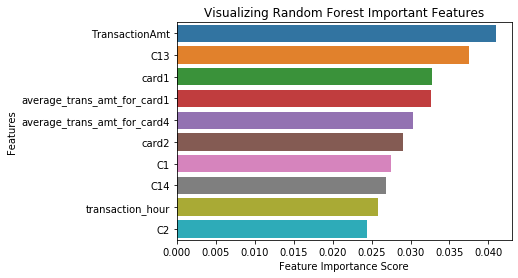

In [17]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

**Observation:** Transaction amount and counting matches appears to be the most important features in detecting fraud. Our feature engineered variables also made it in the top ten with interactions between transaction amount and card information.

Let's try to reduce the noise in the data by placing a threshold of 0.005 for feature importance.

In [18]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.0005
sfm = SelectFromModel(clf, threshold=0.0005)

# Train the classifier
sfm.fit(X_le_train, Y_le_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
    

In [19]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_le_train)
X_important_test = sfm.transform(X_le_test)
X_important_train.shape, X_important_test.shape

((33060, 151), (8266, 151))

In [20]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
fit_and_evaluate(clf_important, X_important_train, Y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.9148193  0.91628797 0.92063926 0.91406832 0.91496441 0.91202854
 0.91358816 0.91142706 0.92170206 0.90877976]
This model's ROC AUC score is :  0.915544 (0.003813)
This model has an accuracy of 84.10% in predicting fraudulent transactions.

Duration: 0:04:56.782695


**Evaluation:** It looks like our selected importance features didn't have much positive effect on the performance of the model. The AUC score for this model is 0.914, which is lower than the initial random forest model. The accuracy did increase a bit from 83.91% to 83.94%.

**Optimization**

We'll continue with all features from the inital random forest for further tuning.

In [21]:

#Optimized model with Random Forest Classifier
start_time = datetime.now()

clf_opt = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=250)

# Train the classifier
fit_and_evaluate(clf_opt, X_le_train, Y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.91231986 0.91068687 0.91317918 0.91148909 0.90935965 0.90688034
 0.90861013 0.90729298 0.91884066 0.90470753]
This model's ROC AUC score is :  0.909881 (0.004173)
This model has an accuracy of 83.63% in predicting fraudulent transactions.

Duration: 0:01:34.154069


**Evaluation:** This model has a AUC score is 0.909 on the training set, which is worse than the initial random forest model.


Let's continue tuning to see if we can improve the preformance of the model.

In [22]:
#Optimized model with Random Forest Classifier
start_time = datetime.now()

clf_opt2 = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=250, 
                                  max_leaf_nodes=50, min_samples_leaf=50, min_samples_split=30 )
# Train the classifier
fit_and_evaluate(clf_opt2, X_le_train, Y_le_train)


end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.86346425 0.87481962 0.87428621 0.8592008  0.8680516  0.86114066
 0.86982311 0.86255114 0.87351674 0.86245068]
This model's ROC AUC score is :  0.866526 (0.005775)
This model has an accuracy of 78.92% in predicting fraudulent transactions.

Duration: 0:00:59.078378


**Evaluation:** Further tuning of random forest has decreased ROC AUC score and has a lower accuracy rate than the previous random forest models.

## Best performing Random Forest model

In [23]:
# This function helps to plot ROC curve
def roc_curve(model, train_x, train_y, test_x, test_y):
    y_prob_predict = model.predict_proba(train_x)[:, 1]
    y_prob_predict2 = model.predict_proba(test_x)[:, 1]
    fpr, tpr, t_holds = metrics.roc_curve(train_y, y_prob_predict)
    fpr2, tpr2, t_holds = metrics.roc_curve(test_y, y_prob_predict2)

    auc_model = metrics.roc_auc_score(train_y, y_prob_predict)
    auc_model2 = metrics.roc_auc_score(test_y, y_prob_predict2)

    figure, ax = plt.subplots()
    ax.plot(fpr, tpr, label="Train, auc=" + str(auc_model))
    ax.plot(fpr2, tpr2, label="Test, auc=" + str(auc_model2))

    plt.title('curve - ROC')
    ax.legend(loc=4)
    plt.xlabel('Rate - False Positive')
    plt.ylabel('Rate - True Positive Rate')

    plt.show()


In [24]:
# Using test set evaluate the model
def pred_test(model, train_x, train_y, test_x, test_y):
    # Model Fit
    model.fit(train_x, train_y)

    # use test set to predict
    y_pred = model.predict(test_x)
    roc = metrics.roc_auc_score(test_y, y_pred)

    # Get ROC values
    roc_result = '%f (%f)' % (roc.mean(), roc.std())
    print("ROC AUC score of this model is : {}".format(roc_result))

    # Get Accuracy values
    acc = accuracy_score(test_y, y_pred)
    print("Accuracy score of this model is : {}".format(acc))

    # obtain confusion matrix and create classification report
    conf_m = confusion_matrix(test_y, y_pred)
    fp = conf_m.sum(axis=0) - np.diag(conf_m)
    fn = conf_m.sum(axis=1) - np.diag(conf_m)
    tp = np.diag(conf_m)
    tn = conf_m.sum() - (fp + fn + tp)

    # Specificity or true negative rate
    tnr = tn/(tn + fp)
    # Sensitivity, hit rate, recall, or true positive rate
    tpr = tp/(fn +tp)
    # Negative predictive value
    npv = tn/(fn +tn)
    # Fall out or false positive rate
    fpr = fp/(tn + fp)
    # Precision or positive predictive value
    ppv = tp/(fp + tp)
    # Overall accuracy
    acc = (tn +tp)/(tp + fn + tn + fp)
    # False discovery rate
    fdr = fp/(fp + tp)
    # False negative rate
    fnr = fn/(tp + fn)


    print('------------------------------------------------------------')
    print('Fraudulent transactions predicted correctly (TPR): {}'.format(tpr))
    print('Normal transactions predicted correctly (TNR): {}'.format(tnr))
    print('Normal transactions predicted incorrectly (FPR): {}'.format(fpr))
    print('Fraudulent transactions predicted incorrectly (FNR): {}'.format(fnr))
    print('------------------------------------------------------------')

    print('Classification Report')
    print(classification_report(test_y, y_pred))
    print('------------------------------------------------------------')

    return roc_curve(model, train_x, train_y, test_x, test_y)


Random Forest Classifer
ROC AUC score of this model is : 0.835834 (0.000000)
Accuracy score of this model is : 0.835833534962497
------------------------------------------------------------
Fraudulent transactions predicted correctly (TPR): [0.85748851 0.81417856]
Normal transactions predicted correctly (TNR): [0.81417856 0.85748851]
Normal transactions predicted incorrectly (FPR): [0.18582144 0.14251149]
Fraudulent transactions predicted incorrectly (FNR): [0.14251149 0.18582144]
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4133
           1       0.85      0.81      0.83      4133

    accuracy                           0.84      8266
   macro avg       0.84      0.84      0.84      8266
weighted avg       0.84      0.84      0.84      8266

------------------------------------------------------------


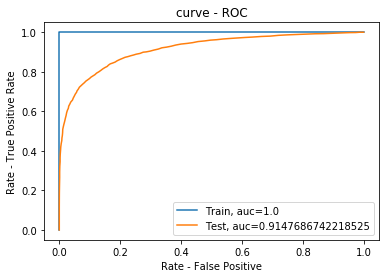


Duration: 0:00:06.300411


In [25]:
# Random Forest Classifer
start_time = datetime.now()

print('Random Forest Classifer')

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

pred_test(clf, X_le_train, Y_le_train, X_le_test, Y_le_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

**Evaluation:** This model has a ROC AUC score on the test set 0.913 and accuracy score of 83.77%. It correctly predicted 81% fraud transactions and 86% normal transaction. 

The best set of parameters for random forest was setting the number of trees to 100. 

Random forest had a longer computational time than logistic regression. 


## Gradient Boost

In [26]:
#Gradient Boosting Classifer
start_time = datetime.now()

gb = GradientBoostingClassifier(random_state=42)

#Train the classifier
fit_and_evaluate(gb, X_le_train, Y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.88307296 0.8952633  0.89256861 0.88151774 0.89013943 0.88360546
 0.88573361 0.88203578 0.8964057  0.88330206]
This model's ROC AUC score is :  0.887364 (0.005415)
This model has an accuracy of 80.96% in predicting fraudulent transactions.

Duration: 0:18:18.475714


**Evaluation:** The initial gradient boosting model has a scoe of 0.88 and an accuracy score of 80.96%. These results are relatively lower than the random forest models. Also, the computational time is way higher than the random forest models.

#### Feature Importances

In [27]:
# Top N importances

gb.fit(X_le_train, Y_le_train)

N = 10
importances = gb.feature_importances_

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N_gb = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N_gb

,Variable,Importance
22,C14,0.132951
10,C1,0.131455
62,V74,0.077277
159,V317,0.065210
14,C5,0.062951
150,V308,0.049539
39,V29,0.038174
17,C8,0.034601
20,C12,0.033587
7,card6,0.033048


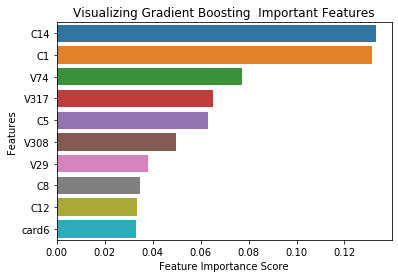

In [45]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N_gb)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Gradient Boosting  Important Features")
plt.show()

**Observation:** Count of card informatino matches and vesta feature engineerd variables appear to the top contributing factors in detecting fraud for this model.

##### Optomization

Tuning number of trees added to the model.

In [29]:
#Optimizing Random Forest
parameters = {}
parameters['min_samples_leaf'] = [50, 100, 200]
parameters['min_samples_split'] = [10, 30, 50]
parameters['max_leaf_nodes'] = [2, 10, 50]

gsc_clf = GridSearchCV(clf_opt, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_clf.fit(X_le_train, Y_le_train)
print(gsc_clf.best_params_, gsc_clf.best_score_)

#Result: {'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 50} 0.8672281193704677


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.3min finished


{'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 30} 0.8668685581111759


In [30]:
#Gradient Boosting Classifer
start_time = datetime.now()

gb_opt = GradientBoostingClassifier(n_estimators=100, random_state=42)

#Train the classifier
fit_and_evaluate(gb_opt, X_le_train, Y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.88307296 0.8952633  0.89256861 0.88151774 0.89013943 0.88360546
 0.88573361 0.88203578 0.8964057  0.88330206]
This model's ROC AUC score is :  0.887364 (0.005415)
This model has an accuracy of 80.96% in predicting fraudulent transactions.

Duration: 0:16:43.130126


**Evaluation:** Both the AUC score and accuracy score remains around 0.89 and 81% respectively. We'll stop here with tuning Gradient Boosting since it doesn't seem to be beating the Random Forest baseline model. 

### Best performing Gradient Boosting model

ROC AUC score of this model is : 0.805226 (0.000000)
Accuracy score of this model is : 0.8052262279216066
------------------------------------------------------------
Fraudulent transactions predicted correctly (TPR): [0.83401887 0.77643358]
Normal transactions predicted correctly (TNR): [0.77643358 0.83401887]
Normal transactions predicted incorrectly (FPR): [0.22356642 0.16598113]
Fraudulent transactions predicted incorrectly (FNR): [0.16598113 0.22356642]
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4133
           1       0.82      0.78      0.80      4133

    accuracy                           0.81      8266
   macro avg       0.81      0.81      0.81      8266
weighted avg       0.81      0.81      0.81      8266

------------------------------------------------------------


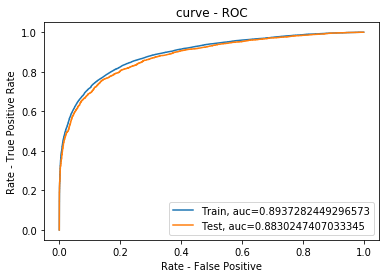


Duration: 0:00:19.521284


In [31]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb = GradientBoostingClassifier(random_state=42)

# Train the classifier
pred_test(gb, X_le_train, Y_le_train, X_le_test, Y_le_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

**Evaluation:** This model has an AUC score of 0.88 on the testing set and an accuracy score of 80.52%. In terms of misclassification, this model failed to classify 16.59% of normal transactions and 22.35% of fraudulent transactions. 

We did not include hyperparameters in the final model since tuning it lead to lower performance. 


### Logistic Regression

In [32]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_db_train), Y_db_train)

C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [33]:
# List of selected features
selected_feat = X_db.columns[(sel_.get_support())]

print('total features: {}'.format((X_db.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 173
selected features: 88
features with coefficients shrank to zero: 85


In [34]:
# Identifying removed features
removed_feats = X_db.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['TransactionAmt', 'card1', 'card2', 'addr1', 'addr2', 'C1', 'C2', 'C4',
       'C5', 'C6', 'C8', 'C9', 'C10', 'C12', 'C13', 'C14', 'D1', 'D10', 'D15',
       'V14', 'V26', 'V57', 'V59', 'V61', 'V63', 'V66', 'V76', 'V77', 'V79',
       'V80', 'V81', 'V85', 'V90', 'V92', 'V96', 'V97', 'V99', 'V100', 'V102',
       'V103', 'V104', 'V105', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131',
       'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V285',
       'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V301',
       'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314',
       'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
       'transaction_day_of_week', 'average_trans_amt_for_card1',
       'average_trans_amt_for_card4'],
      dtype='object')

In [35]:
# Removing features from train and test set
X_train_selected = sel_.transform(X_db_train)
X_test_selected = sel_.transform(X_db_test)
X_train_selected.shape, X_test_selected.shape

((33060, 88), (8266, 88))

In [36]:
# Logisitic Regression 
start_time = datetime.now()

print('Logistic Regression')

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

fit_and_evaluate(logreg, X_train_selected, Y_db_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Logistic Regression


C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-package

[0.81531626 0.82578834 0.81978595 0.80385934 0.81716372 0.80503706
 0.8140562  0.8115273  0.82308725 0.80326005]
This model's ROC AUC score is :  0.813888 (0.007558)
This model has an accuracy of 73.28% in predicting fraudulent transactions.

Duration: 0:00:40.404058


**Evaluation:** Here, our baseline model has an AUC score of 0.813 on the training set. From the cross validation score, this model doesn't seem to be overfitting since the scores are relatively close within range to each other. The accuracy is 73.28%, which is rather low. 

### Optimization

In [37]:
#Optimizing Logistic Regression
#parameters = {}
#parameters['penalty'] = ['l1', 'l2']
#parameters['tol'] = [1e-3, 1e-4, 1e-5]
#parameters['C'] = [1, 1e-2, 1e-4]

#gsc_lr = GridSearchCV(logreg, parameters, cv=5, scoring='roc_auc')
#gsc_lr.fit(X_train_selected, y_db_train)
#print(gsc_lr.best_params_, gsc_lr.best_score_)

# Result: {'C': 1, 'penalty': 'l2', 'tol': 1e-05} 0.8530127574410966

In [38]:
#Optimized model with Logistic Regression
start_time = datetime.now()

print('Optimized Logistic Regression')

lr_opt = LogisticRegression(C=1, penalty='l2', tol=1e-05)

fit_and_evaluate(lr_opt, X_train_selected, Y_db_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))
    

Optimized Logistic Regression


C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-package

[0.81531846 0.82578578 0.81979253 0.80386081 0.81716299 0.80504621
 0.81405401 0.81151815 0.82309017 0.80326115]
This model's ROC AUC score is :  0.813889 (0.007558)
This model has an accuracy of 73.27% in predicting fraudulent transactions.

Duration: 0:00:51.626072


**Evaluation:** The optimized logistic regression model has essentially the same AUC score of 0.813 on the training set. From the cross validation score, this model doesn't seem to be overfitting since the scores range between 0.80 to 0.82. The accuracy score is the same as the initial model, 73.29%. Since our primary metric is ROC AUC, we will continue with the initial logistic regression model since it has a slightly higher AUC score. 

### Best performing Logistic Regression model

Logistic Regression


C:\Users\CBRAHAKM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score of this model is : 0.737358 (0.000000)
Accuracy score of this model is : 0.7373578514396323
------------------------------------------------------------
Fraudulent transactions predicted correctly (TPR): [0.75756109 0.71715461]
Normal transactions predicted correctly (TNR): [0.71715461 0.75756109]
Normal transactions predicted incorrectly (FPR): [0.28284539 0.24243891]
Fraudulent transactions predicted incorrectly (FNR): [0.24243891 0.28284539]
------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      4133
           1       0.75      0.72      0.73      4133

    accuracy                           0.74      8266
   macro avg       0.74      0.74      0.74      8266
weighted avg       0.74      0.74      0.74      8266

------------------------------------------------------------


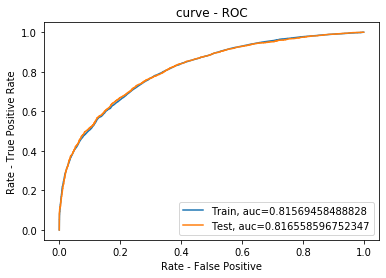


Duration: 0:00:01.621668


In [39]:
# Logisitic Regression 
start_time = datetime.now()

print('Logistic Regression')

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

pred_test(logreg, X_train_selected, Y_db_train, X_test_selected, Y_db_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

**Evaluation:** This model has an AUC score of 0.73 on the testing set and an accuracy score of 81.66%. In terms of misclassification, this model failed to classify 24.31% of normal transactions and 28.30% of fraudulent transactions. 

We did not include hyperparameters in the final model since tuning it lead to lower performance. 


### Model Results

In [42]:
# df_db
X_train, X_test, Y_train, Y_test = train_test_split(X_db, Y_db, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(33060, 173) (8266, 173)
(33060,) (8266,)


In [43]:

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GradientBoostingClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

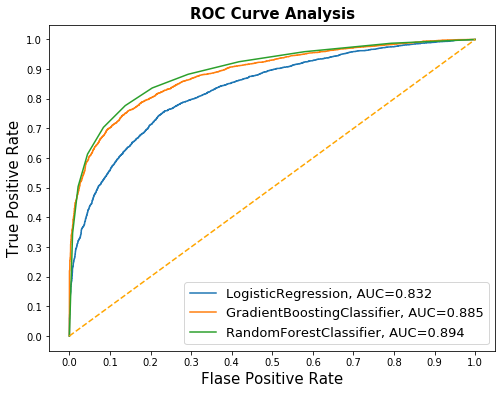

In [44]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

After feature selection, the logistic regression model perform better than random guess with a AUC score of 0.83 on the test set. Random forest with all features performed that best with a AUC score of 0.89 on the test set. Gradient boosting was a close match to random forest with a AUC score of 0.88 on the test set. However, its false negative rate remained 4% higher than random forest. Also, Random Forest is perform better than Gradient Boosting. With these results, we will move forward with only random forest.